In [68]:
## Load dataset with and without SAR
from importlib import reload
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import data

import SyntheticDatacheck
reload(SyntheticDatacheck)

from evaluation import load_model
from train import train_GAT_GraphSVX_foroptuna, train_GraphSAGE_foroptuna
import torch

from evaluation import get_sar_indices

In [44]:
model, traindata, testdata, feature_names, target_names = load_model('GAT', '100K_accts_MID5')


In [45]:
sar_indices=get_sar_indices(model,testdata)

sar_indices_used=sar_indices[:500]

In [54]:
model.set_return_attention_weights(True)
model.eval()
with torch.no_grad():
    _,attention_weights = model.forward(testdata.x, testdata.edge_index)

In [61]:
sar_indices_used

array([  26,   31,   61,   64,   68,   77,   88,   91,   93,   95,   96,
        124,  126,  138,  142,  151,  159,  169,  184,  191,  198,  216,
        217,  224,  244,  246,  268,  269,  279,  320,  328,  329,  342,
        343,  350,  352,  371,  372,  374,  377,  393,  409,  425,  439,
        450,  456,  462,  471,  511,  534,  566,  580,  594,  603,  609,
        614,  615,  623,  640,  646,  659,  660,  661,  669,  703,  749,
        774,  775,  788,  795,  796,  843,  856,  860,  871,  872,  876,
        905,  914,  931,  945,  986,  990,  999, 1003, 1005, 1006, 1013,
       1021, 1023, 1028, 1036, 1046, 1049, 1052, 1054, 1065, 1067, 1072,
       1077, 1081, 1086, 1116, 1127, 1134, 1147, 1159, 1170, 1171, 1209,
       1242, 1279, 1287, 1288, 1323, 1345, 1359, 1361, 1363, 1371, 1382,
       1391, 1403, 1419, 1421, 1425, 1430, 1456, 1463, 1480, 1524, 1527,
       1530, 1545, 1546, 1555, 1576, 1581, 1601, 1613, 1615, 1649, 1663,
       1682, 1706, 1755, 1779, 1804, 1818, 1820, 18

In [86]:
import SyntheticDatacheck
reload(SyntheticDatacheck)
#Create an object of the class datacheck
DATASET='100K_accts_MID5'
dc_std = SyntheticDatacheck.Datacheck(DATASET,importance='std',aggregated=True,attention_weights=attention_weights,sar_indices_used=sar_indices_used)



last_sar_index 6093
last_sar_index 6093


KeyboardInterrupt: 

In [85]:
dc_std.importance_test.iloc[sar_indices_used]

,sum,in_sum,out_sum,mean,in_mean,out_mean,median,in_median,out_median,std,...,n_unique_out,count_days_in_bank,count_phone_changes,sum_spending,mean_spending,median_spending,std_spending,max_spending,min_spending,count_spending
26,2.753504,0.772338,4.330721,3.391959,5.002624,0.323196,9.316143,5.451339,1.387974,0.102857,...,17.030305,1.147249,0.0,0.462698,1.396791,0.288864,1.741841,1.209786,6.057392,0.803648
31,10.837443,1.509713,11.361042,17.968712,19.490465,2.194353,16.940686,18.264511,0.000861,0.062943,...,26.214111,0.920740,0.0,1.070279,1.451623,1.052980,1.742236,1.476976,6.715965,0.292186
61,50.592575,49.634895,0.170817,31.928946,9.256782,8.399415,32.941701,9.495513,6.295951,2.188417,...,12.897708,1.287794,0.0,0.904610,0.482644,0.758114,0.469238,0.647528,6.498745,0.419183
64,15.181386,7.349466,9.374797,29.359855,4.432712,26.459439,22.758924,7.251436,29.164759,8.586607,...,25.565552,0.300450,0.0,6.021990,6.249425,0.005405,9.087198,8.426337,4.620211,0.291773
68,4.332805,1.398638,3.548809,9.414978,4.886904,1.661802,7.465464,3.807050,0.546725,1.014999,...,5.759717,0.097226,0.0,1.890512,1.748577,0.653026,2.416410,2.309458,5.527552,0.241892
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6073,2.971895,7.859486,6.186809,5.219998,11.858990,17.915689,3.573004,7.729931,16.422302,15.945301,...,20.302595,16.244545,0.0,17.823802,18.165493,14.965991,18.317573,17.423434,16.637526,13.982009
6080,5.182928,5.943164,13.760711,10.877348,19.464801,18.658196,23.540027,21.078527,17.512444,20.414399,...,50.433564,14.581066,0.0,12.743578,12.566602,12.946157,11.464347,11.175416,4.407559,14.288699
6087,5.226653,2.246413,3.582215,5.533780,3.239512,6.134485,0.166674,0.963088,6.513404,2.789595,...,4.248734,0.361782,0.0,0.040340,0.508037,0.210280,0.423160,0.191573,9.388217,0.555571
6089,19.191351,23.652886,6.092852,27.075077,17.577112,21.292501,25.610400,17.682820,21.387138,14.702185,...,14.686456,16.255414,0.0,15.246144,16.078612,14.111261,15.461761,14.496783,34.641958,13.585824


In [81]:
import SyntheticDatacheck
reload(SyntheticDatacheck)
dc_llr = SyntheticDatacheck.Datacheck(DATASET,importance='llr',aggregated=True,attention_weights=attention_weights,sar_indices_used=sar_indices_used)


last_sar_index 6093
last_sar_index 6093
last_sar_index 6093
agg Index(['sum', 'in_sum', 'out_sum', 'mean', 'in_mean', 'out_mean', 'median',
       'in_median', 'out_median', 'std', 'in_std', 'out_std', 'max', 'in_max',
       'out_max', 'min', 'in_min', 'out_min', 'count_in', 'count_out',
       'n_unique_in', 'n_unique_out', 'count_days_in_bank',
       'count_phone_changes', 'sum_spending', 'mean_spending',
       'median_spending', 'std_spending', 'max_spending', 'min_spending',
       'count_spending', 'is_sar', 'account'],
      dtype='object')


divide by zero encountered in log


importance        account  count_days_in_bank_1  count_in_1  count_out_1  \
0        44638              1.461963    1.620336     1.261792   
1        49624              1.461963    1.620336     1.261792   
2        92402              1.461963    1.620336     1.261792   
3        13102              1.461963    1.620336     1.261792   
4        84116              1.461963    1.620336     1.261792   
...        ...                   ...         ...          ...   
99906    11594              1.461963    1.620336     1.261792   
99907     7961              1.461963    1.620336     1.261792   
99908    20250              1.461963    1.620336     1.261792   
99909    70144              1.461963    1.620336     1.261792   
99910     7012              1.461963    1.620336     1.261792   

       count_phone_changes_1  count_spending_1  in_max_1  in_mean_1  \
0                   1.247172          1.461554  1.572568   1.498779   
1                   1.247172          1.461554  1.572568   1.49877

In [83]:
dc_llr.importance_test.iloc[sar_indices_used]

,sum,in_sum,out_sum,mean,in_mean,out_mean,median,in_median,out_median,std,...,n_unique_out,count_days_in_bank,count_phone_changes,sum_spending,mean_spending,median_spending,std_spending,max_spending,min_spending,count_spending
26,-5467.031614,-5592.666399,36.277742,-15.817425,110.488859,3.332677,8.224087,124.281355,33.072963,1.444186,...,162.465005,-25.654841,0.0,-119.378532,-120.111740,-3.483578,-169.709790,-165.706425,35.209196,0.224023
31,-37.000589,-86.987333,179.506525,-43.599747,404.261745,-6.639353,-820.605752,383.916773,-112.099183,0.631612,...,458.967875,-2.604972,0.0,155.738678,148.145547,-6.657169,202.581517,197.337031,46.141521,36.983283
61,920.448374,1130.553808,17.942562,48.405838,164.314330,8.147479,661.811025,191.063382,97.252800,0.663925,...,107.561948,2.789074,0.0,23.182159,36.928066,-14.745575,36.084651,32.419623,-22.639063,-31.523759
64,-184.648397,-183.747264,48.870422,-44.791790,-58.262094,16.650219,-840.302925,-85.092610,305.120548,0.972389,...,111.556716,-13.950678,0.0,-6.405607,-3.712355,21.234547,-18.578438,-18.551564,-22.186897,-1.909568
68,-19.408872,-17.306652,31.121944,-28.532454,66.640696,-21.299173,-200.633913,88.366449,-377.503854,0.028029,...,34.941927,-4.051175,0.0,-0.052786,-7.394931,-2.130726,-5.239911,-2.833669,11.276432,11.238799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6073,-4.834849,2.112152,14.801475,-5.766372,27.172449,-4.755807,-44.322510,26.118979,-74.572283,0.092994,...,33.917674,-0.562065,0.0,17.439402,1.569411,1.954745,-2.503209,6.553030,102.207667,10.559355
6080,8.405993,-8.989445,83.401174,5.251011,74.055022,3.057725,432.448299,65.674896,1.308533,1.022787,...,473.068264,20.453649,0.0,-87.402417,-73.500206,-55.862734,-92.434502,-97.871092,8.419297,-14.737256
6087,18.251456,25.445758,-8.494971,23.739556,82.833364,-4.338153,4.558762,50.689228,-64.665413,0.009273,...,-42.465282,-1.898066,0.0,-45.223360,-25.767652,15.566072,-51.805036,-58.929137,382.441846,-21.991944
6089,-149.748722,-111.672417,18.098538,-35.290088,-34.689747,-2.990537,-620.894350,-71.208636,-46.808710,0.400506,...,-6.575094,-3.330917,0.0,-82.433032,-81.470397,9.997892,-125.001141,-121.390710,-816.822305,-4.415366


In [10]:
llr_before, llr_after= dc_llr.get_node_importance_LLR(8)

Node: 8 is associated with Account_ID: 93894 


/home/agnes/desktop/tnevenv/lib/python3.10/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


(       sum    in_sum   out_sum      mean   in_mean  out_mean    median  \
 8  0.12717  0.237419  0.032203  0.376641  0.997445  2.066495  0.022656   
 
    in_median  out_median       std  ...  unique_out  count_days_in_bank  \
 8   0.517928    2.013327  1.843946  ...         0.0            0.618112   
 
    count_phone_changes  sum_spending  mean_spending  median_spending  \
 8             1.119258      0.012189       0.012943        -0.053264   
 
    std_spending  max_spending  min_spending  count_spending  
 8      0.019445      0.018179     -0.139186       -0.115317  
 
 [1 rows x 31 columns],
        sum    in_sum   out_sum      mean   in_mean  out_mean    median  \
 7  0.12717  0.237419  0.032203  0.376641  0.997445  2.066495  0.022656   
 
    in_median  out_median       std  ...  unique_out  count_days_in_bank  \
 7   0.517928    2.013327  1.843946  ...         0.0             0.57381   
 
    count_phone_changes  sum_spending  mean_spending  median_spending  \
 7             

In [ ]:
#Print the length of val,test,and train 
# print('Length of val:',len(dc.normal_val))
print('Length of test:',len(dc.normal_test))
print('Length of test withoutsar:',len(dc.withoutSAR_test))
print('Difference',len(dc.normal_test)-len(dc.withoutSAR_test))
print('Length of train:',len(dc.normal_train))
print('Length of train withoutsar:',len(dc.withoutSAR_train))
print('Difference',len(dc.normal_train)-len(dc.withoutSAR_train))



NameError: name 'dc' is not defined

In [17]:
dc.withoutSAR_train.columns

Index(['account', 'bank', 'sum', 'mean', 'median', 'std', 'max', 'min',
       'in_sum', 'out_sum', 'in_mean', 'out_mean', 'in_median', 'out_median',
       'in_std', 'out_std', 'in_max', 'out_max', 'in_min', 'out_min',
       'count_in', 'count_out', 'n_unique_in', 'n_unique_out',
       'count_days_in_bank', 'count_phone_changes', 'sum_spending',
       'mean_spending', 'median_spending', 'std_spending', 'max_spending',
       'min_spending', 'count_spending', 'is_sar'],
      dtype='object')

In [18]:
dc.withoutSAR_train[dc.withoutSAR_train['count_in']==0]

,account,bank,sum,mean,median,std,max,min,in_sum,out_sum,...,count_days_in_bank,count_phone_changes,sum_spending,mean_spending,median_spending,std_spending,max_spending,min_spending,count_spending,is_sar
84155,73155,bank,-4688.75,-586.093750,-503.245,204.962855,-322.40,-952.71,0.0,-4688.75,...,325.0,0.0,127968.68,1319.264742,416.170,3170.460297,12577.39,11.84,97.0,0.0
84156,89284,bank,-6422.00,-535.166667,-562.940,290.560844,-11.13,-997.68,0.0,-6422.00,...,318.0,0.0,81408.17,830.695612,421.065,1490.550203,6065.81,1.90,98.0,0.0
84157,88089,bank,-8005.34,-727.758182,-649.740,246.529872,-297.07,-1152.69,0.0,-8005.34,...,298.0,0.0,135718.80,1304.988462,399.820,3195.363411,13076.71,0.19,104.0,0.0
84158,88303,bank,-3806.75,-475.843750,-495.560,282.877270,-105.67,-789.00,0.0,-3806.75,...,332.0,0.0,89657.33,862.089712,469.805,1432.113085,6036.44,10.09,104.0,0.0
84159,72713,bank,-4390.96,-878.192000,-1035.770,484.379169,-342.27,-1314.88,0.0,-4390.96,...,324.0,0.0,117072.29,1245.449894,394.020,2845.753105,11156.74,17.40,94.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99739,51022,bank,-745.13,-745.130000,-745.130,0.000000,-745.13,-745.13,0.0,-745.13,...,338.0,0.0,0.00,0.000000,0.000,0.000000,0.00,0.00,0.0,0.0
99740,69084,bank,-1279.34,-1279.340000,-1279.340,0.000000,-1279.34,-1279.34,0.0,-1279.34,...,339.0,0.0,130464.58,1402.844946,470.890,3212.857602,12544.39,5.37,93.0,0.0
99741,67280,bank,-435.56,-435.560000,-435.560,0.000000,-435.56,-435.56,0.0,-435.56,...,339.0,0.0,128555.02,1477.643908,475.950,3387.160842,12829.79,26.82,87.0,0.0
99742,64458,bank,-1022.31,-1022.310000,-1022.310,0.000000,-1022.31,-1022.31,0.0,-1022.31,...,339.0,0.0,47813.09,605.228987,479.290,443.545521,1563.98,1.06,79.0,0.0


In [31]:

account_id=19231

print(dc.withoutSAR_train[dc.withoutSAR_train['account']==account_id])
dc.normal_train[dc.normal_train['account']==account_id]

Empty DataFrame
Columns: [account, bank, sum, mean, median, std, max, min, in_sum, out_sum, in_mean, out_mean, in_median, out_median, in_std, out_std, in_max, out_max, in_min, out_min, count_in, count_out, n_unique_in, n_unique_out, count_days_in_bank, count_phone_changes, sum_spending, mean_spending, median_spending, std_spending, max_spending, min_spending, count_spending, is_sar]
Index: []

[0 rows x 34 columns]


,account,bank,sum,mean,median,std,max,min,in_sum,out_sum,...,count_days_in_bank,count_phone_changes,sum_spending,mean_spending,median_spending,std_spending,max_spending,min_spending,count_spending,is_sar
56290,19231,bank,3991.66,665.276667,660.57,365.603273,1281.59,160.43,3991.66,0.0,...,323.0,0.0,57968.86,623.321075,459.83,551.65969,2094.07,8.77,93.0,1.0


In [32]:
# Get the set of account indices from normal_train
normal_train_indices = set(dc.normal_train['account'])

# Get the set of account indices from withoutSAR_train
withoutSAR_train_indices = set(dc.withoutSAR_train['account'])

# Check if the sets are equal
if normal_train_indices == withoutSAR_train_indices:
    print("Both dataframes contain the same account indices.")
else:
    print("The dataframes contain different account indices.")
    print(f'Indices in normal_train but not in withoutSAR_train: {normal_train_indices - withoutSAR_train_indices}')
    print(f'Indices in withoutSAR_train but not in normal_train: {withoutSAR_train_indices - normal_train_indices}')

The dataframes contain different account indices.
Indices in normal_train but not in withoutSAR_train: {4353, 4488, 90005, 19231, 49061, 20268, 1709, 61105, 15923, 70324, 2357, 31039, 64075, 2124, 69197, 462, 13777, 3670, 19804, 355, 15471, 18288, 16382}
Indices in withoutSAR_train but not in normal_train: set()


In [13]:
# Get the set of account indices from normal_train
normal_test_indices = set(dc.normal_test['account'])

# Get the set of account indices from withoutSAR_train
withoutSAR_test_indices = set(dc.withoutSAR_test['account'])

# Check if the sets are equal
if normal_test_indices == withoutSAR_test_indices:
    print("Both dataframes contain the same account indices.")
else:
    print("The dataframes contain different account indices.")
    #Print the indices that differ
    print("Indices in normal_test but not in withoutSAR_test:", normal_test_indices - withoutSAR_test_indices)
    print("Indices in withoutSAR_test but not in normal_test:", withoutSAR_test_indices - normal_test_indices)
    

The dataframes contain different account indices.
Indices in normal_test but not in withoutSAR_test: {18721, 5482, 16683, 70060, 19951, 19412, 15413, 11894, 16727, 2136, 73461, 73815, 1819}
Indices in withoutSAR_test but not in normal_test: set()


In [3]:
sars=dc.get_sar_accounts()


In [4]:
sars[0:10]

array([ 47, 124, 169, 192, 243, 255, 345, 361, 371, 402])

In [7]:
node_importance=dc.get_importance(47)
node_importance


82113.0


,importance,org,without_SAR,difference
Node: 47,,,,
n_unique_out,25.692223,8.0,2.0,6.0
count_out,10.235047,11.0,5.0,6.0
out_sum,5.277498,-8534.95,-3046.98,-5487.97
sum,5.250534,80239.92,85727.89,-5487.97
count_spending,3.396496,88.0,53.0,35.0
sum_spending,2.518933,109666.14,73740.05,35926.09
max_spending,1.686008,10887.35,7518.08,3369.27
out_median,1.167145,-801.28,-509.91,-291.37
std_spending,0.696731,2865.521034,2435.934852,429.586181


In [191]:
dc.normal_test
dc.withoutSAR_test
dc.importance_test

,account,sum,mean,median,std,max,min,in_sum,out_sum,in_mean,...,count_days_in_bank,count_phone_changes,sum_spending,mean_spending,median_spending,std_spending,max_spending,min_spending,count_spending,is_sar
0,4455,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0
1,7542,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0
2,6651,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0
3,9188,-1.648815e+00,-0.082956,-0.072605,-0.093494,-0.084516,0.08765,-0.07696,-3.475234,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0
4,1744,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8826,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0
9996,2603,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0
9997,4166,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0
9998,2212,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0


In [174]:
# normal_test[normal_test['account']==1407].drop(columns=['account','is_sar']).T

IndexError: invalid index to scalar variable.

In [162]:
node_importance

,importance,Original Values,New Values
Node: 6,,,
in_max,13.743472,1379.77,1379.77
max,13.743472,1379.77,1379.77
in_sum,7.285647,4243.06,4243.06
sum,6.703955,-2340.14,-2340.14
in_std,4.683161,394.670156,394.670156
min_spending,3.848364,4.88,4.88
in_mean,3.691755,385.732727,385.732727
count_spending,3.529945,150.0,150.0
sum_spending,3.367566,376722.69,376722.69


In [137]:
importance_train,importance_test=SyntheticDatacheck.build_importance('10K_accts_MID5')
SyntheticDatacheck.get_sar_accounts(importance_train)
importance_train.columns


TypeError: build_importance() missing 1 required positional argument: 'dataset'

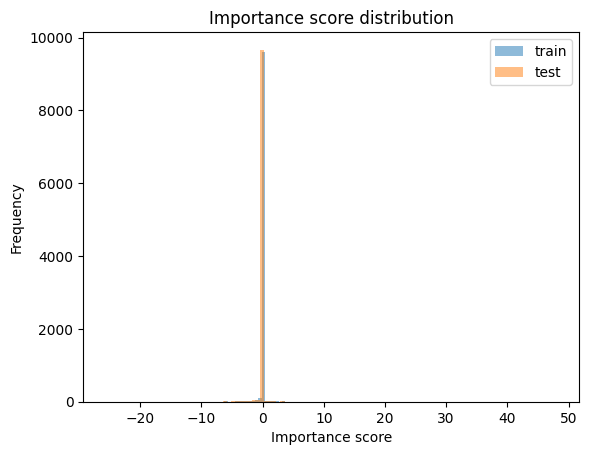

In [39]:
#plot the distribution for the importance score for the first feature
plt.figure()
importance_train['mean'].plot.hist(bins=100, alpha=0.5, label='train')
importance_test['mean'].plot.hist(bins=100, alpha=0.5, label='test')
plt.legend()
plt.xlabel('Importance score')
plt.ylabel('Frequency')
plt.title('Importance score distribution')
plt.show()



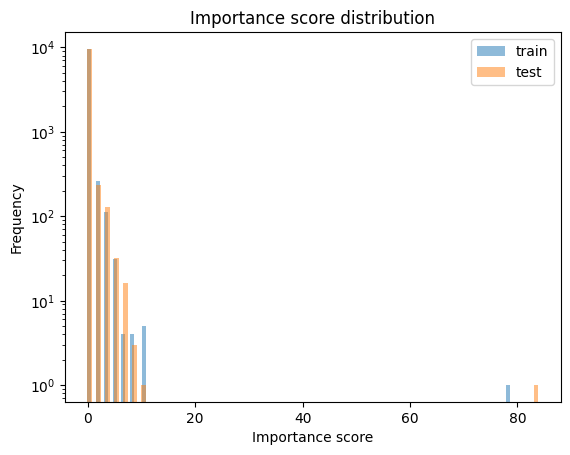

In [45]:
plt.figure()
importance_train['count_out'].plot.hist(bins=100, alpha=0.5, label='train')
importance_test['count_out'].plot.hist(bins=100, alpha=0.5, label='test')
plt.legend()
plt.xlabel('Importance score')
plt.ylabel('Frequency')
plt.title('Importance score distribution')
plt.yscale('log')
plt.show()

In [28]:
SyntheticDatacheck.get_importance(17,importance_train)

,importance
Node: 17,
count_spending,4.468119
mean_spending,2.339095
std_spending,2.203533
sum_spending,1.240369
count_in,0.687888
max_spending,0.687223
in_median,0.463882
sum,0.426951
median,0.395860


In [61]:
print(SyntheticDatacheck.get_importance(node=767,dataframe=importance_train))


                     importance
Node: 767                      
count_days_in_bank     2.738930
out_max                2.252665
in_median              1.923990
std                    1.909634
sum_spending           1.898899
median_spending        1.675455
in_mean                1.645437
mean_spending          1.353302
median                 1.117332
out_std                1.062507
in_std                 0.997633
std_spending           0.970816
mean                   0.558465
count_out              0.542810
out_mean               0.396829
in_max                 0.364505
max                    0.359250
count_spending         0.265460
out_min                0.252123
min                    0.252123
out_sum                0.232267
in_sum                 0.188169
min_spending           0.166414
max_spending           0.078030
count_in               0.071466
sum                    0.032932
out_median             0.023024
count_phone_changes    0.022365
in_min                 0.019776


In [3]:
# orgdata_train = data.AmlsimDataset(node_file='data/10K_accts_MID5/bank/train/nodes.csv', edge_file='data/100K_accts_MID5/bank/train/edges.csv', node_features=True, node_labels=True).get_data()
# newdata_train = data.AmlsimDataset(node_file='data/10K_accts_MID5_withoutSAR/bank/train/nodes.csv', edge_file='data/100K_accts_MID5_withoutSAR/bank/train/edges.csv', node_features=True, node_labels=True).get_data()

# orgdata_test = data.AmlsimDataset(node_file='data/10K_accts_MID5/bank/test/nodes.csv', edge_file='data/100K_accts_MID5/bank/test/edges.csv', node_features=True, node_labels=True).get_data()
# newdata_test = data.AmlsimDataset(node_file='data/10K_accts_MID5_withoutSAR/bank/test/nodes.csv', edge_file='data/100K_accts_MID5_withoutSAR/bank/test/edges.csv', node_features=True, node_labels=True).get_data()

# # mean_train=orgdata_train.x.mean(axis=0)
# # std_train=orgdata_train.x.std(axis=0)

# # mean_test=orgdata_test.x.mean(axis=0)
# # std_test=orgdata_test.x.std(axis=0)

In [4]:
normal_train=pd.read_csv('data2/100K_accts_MID5/bank/train/nodes.csv')
withoutSAR_train=pd.read_csv('data2/100K_accts_MID5bank_withoutSAR/train/nodes.csv')



FileNotFoundError: [Errno 2] No such file or directory: 'data2/100K_accts_MID5bank/train/nodes.csv'

In [3]:


orgdata_train=pd.read_csv('/home/agnes/desktop/data/100K_accts_MID5_withoutSAR/bank/train')
orgdata_test=pd.read_csv('data/10K_accts_MID5/bank/test/nodes.csv')

newdata_train=pd.read_csv('data/10K_accts_MID5_withoutSAR/bank/train/nodes.csv')
newdata_test=pd.read_csv('data/10K_accts_MID5_withoutSAR/bank/test/nodes.csv')


df=pd.DataFrame(orgdata_train)
print('Length of datasets',len(orgdata_train),len(newdata_train))
df=df.merge(newdata_train, on='account')


orgdata_train=pd.DataFrame(orgdata_train)
newdata_train=pd.DataFrame(newdata_train)


# Sample dataframes
df1 = orgdata_train
df2 = newdata_train


Length of datasets 10000 10000


In [4]:
#check order of accounts are same in df1 and df2
print('Order of accounts are same in df1 and df2:',all(df1['account']==df2['account']))
# print('Sum is the same for df1,df2',all(df1['sum']==df2['account']))

Order of accounts are same in df1 and df2: True


In [5]:

# Merge the dataframes on 'account'
diff = pd.merge(df1, df2, on='account', suffixes=('_1', '_2'))
# Take column names from orgdata_train
cols = orgdata_train.columns
# Remove the first column from cols ('account')
cols = cols[2:]
# print(cols)
# Perform subtraction on other columns

for col in cols:
    diff[col] = diff[col+'_1'] - diff[col+'_2']

#remove columns ending with _1 and _2
diff = diff.drop(diff.columns[diff.columns.str.endswith('_1')], axis=1)
diff = diff.drop(diff.columns[diff.columns.str.endswith('_2')], axis=1)

print('diff',diff)
#Calculate for all except account
diff_cop=diff.drop(['account','is_sar'], axis=1)
print('diff cop',diff_cop)
diff_mean=diff_cop.mean(axis=0) 
diff_std=diff_cop.std(axis=0)
diff_mean

#Calculate score by subtracting mean and divide by std but exclude account column
diff_score=(diff_cop-diff_mean)/diff_std
diff_score['account']=diff['account']

#Reorder put account first
cols = diff_score.columns.tolist()
cols = cols[-1:] + cols[:-1]
diff_score=diff_score[cols]
diff_score['is_sar']=diff['is_sar']

diff_score



diff       account  sum  mean  median  std  max  min  in_sum  out_sum  in_mean  \
0        4455  0.0   0.0     0.0  0.0  0.0  0.0     0.0      0.0      0.0   
1        7542  0.0   0.0     0.0  0.0  0.0  0.0     0.0      0.0      0.0   
2        6651  0.0   0.0     0.0  0.0  0.0  0.0     0.0      0.0      0.0   
3        9188  0.0   0.0     0.0  0.0  0.0  0.0     0.0      0.0      0.0   
4        1744  0.0   0.0     0.0  0.0  0.0  0.0     0.0      0.0      0.0   
...       ...  ...   ...     ...  ...  ...  ...     ...      ...      ...   
9995     8826  0.0   0.0     0.0  0.0  0.0  0.0     0.0      0.0      0.0   
9996     2603  0.0   0.0     0.0  0.0  0.0  0.0     0.0      0.0      0.0   
9997     4166  0.0   0.0     0.0  0.0  0.0  0.0     0.0      0.0      0.0   
9998     2212  0.0   0.0     0.0  0.0  0.0  0.0     0.0      0.0      0.0   
9999     4559  0.0   0.0     0.0  0.0  0.0  0.0     0.0      0.0      0.0   

      ...  count_days_in_bank  count_phone_changes  sum_spending  \
0 

,account,sum,mean,median,std,max,min,in_sum,out_sum,in_mean,...,count_days_in_bank,count_phone_changes,sum_spending,mean_spending,median_spending,std_spending,max_spending,min_spending,count_spending,is_sar
0,4455,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0
1,7542,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0
2,6651,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0
3,9188,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0
4,1744,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8826,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0
9996,2603,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0
9997,4166,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0
9998,2212,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0


In [6]:
#Get the accounts with is_sar=1
sar_accounts=diff_score[diff_score['is_sar']==1]
sar_accounts_indices=diff_score[diff_score['is_sar']==1].index
len(sar_accounts_indices)

434

In [56]:
#print diff_cop for all accounts in sar_accounts
print(diff_score.iloc[17])
print(diff_score.iloc[0])

account                1583.000000
sum                       0.426951
mean                      0.109554
median                    0.395860
std                      -0.173280
max                      -0.084516
min                       0.087650
in_sum                    0.391938
out_sum                   0.154255
in_mean                  -0.216083
out_mean                  0.087570
in_median                -0.463882
out_median                0.064511
in_std                   -0.167056
out_std                  -0.076229
in_max                   -0.084516
out_max                  -0.018871
in_min                    0.020166
out_min                   0.087650
count_in                  0.687888
count_out                -0.118912
count_days_in_bank       -0.028901
count_phone_changes      -0.022365
sum_spending              1.240369
mean_spending            -2.339095
median_spending           0.056713
std_spending             -2.203533
max_spending             -0.687223
min_spending        

In [63]:
diff_score

,account,sum,mean,median,std,max,min,in_sum,out_sum,in_mean,...,count_days_in_bank,count_phone_changes,sum_spending,mean_spending,median_spending,std_spending,max_spending,min_spending,count_spending,is_sar
0,4455,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0
1,7542,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0
2,6651,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0
3,9188,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0
4,1744,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,8826,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0
9996,2603,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0
9997,4166,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0
9998,2212,6.397460e-19,0.011666,0.013144,-0.110843,-0.084516,0.08765,-0.07696,0.154255,-0.090635,...,-0.028901,-0.022365,-0.033263,0.107566,0.013909,0.108772,0.054434,0.082594,-0.222749,0


In [58]:
def feature_importance(node): 
    #values should be the index = node in diff_score
    account=diff_score.loc[node]['account']
    print(account)
    values = diff_score[diff_score['account'] == account]
    values = values.abs()
    values = values.drop(['account', 'is_sar'], axis=1)
    # Transpose
    values = values.T
    
    # Change column name
    values.columns = ['Importance']
    
    # Set name for dataframe
    values.index.name = node
    
    # Sort by 'Importance' column
    values = values.sort_values(by='Importance', ascending=False)
    
    # Add other columns
    values['Original values'] = orgdata_train[orgdata_train['account'] == account].drop(['account', 'is_sar'], axis=1).T
    values['New values'] = newdata_train[newdata_train['account'] == account].drop(['account', 'is_sar'], axis=1).T
    values['Difference'] = values['New values']- values['Original values'] 
    values['Mean difference'] = diff_mean
    values['Std difference'] = diff_std
    
    return values

node= 79#93737#50228 #68840
res = feature_importance(node)
print(res)

# get is_sar for account
diff_score.iloc[node]['is_sar']
diff_cop.iloc[node]

7146.0
                     Importance Original values   New values   Difference  \
79                                                                          
std_spending           6.177720      2305.28123  6641.243442  4335.962212   
max_spending           5.282318        10173.18     21143.48      10970.3   
count_spending         4.803181             153           78          -75   
mean_spending          4.774172     1076.060523  2894.531923    1818.4714   
min_spending           4.332653            5.77        21.36        15.59   
out_median             3.830438        -696.585      -632.73       63.855   
sum_spending           3.340752       164637.26    225773.49     61136.23   
out_sum                1.712699        -11225.0    -10260.41       964.59   
count_out              1.594518              16           15           -1   
mean                   1.242280      -42.952188   -13.221935    29.730252   
median                 1.035960          -5.155        26.41       31

sum                     -964.590000
mean                     -29.730252
median                   -31.565000
std                        6.228742
max                        0.000000
min                        0.000000
in_sum                     0.000000
out_sum                 -964.590000
in_mean                    0.000000
out_mean                 -17.535167
in_median                  0.000000
out_median               -63.855000
in_std                     0.000000
out_std                   -6.648142
in_max                     0.000000
out_max                    0.000000
in_min                     0.000000
out_min                    0.000000
count_in                   0.000000
count_out                  1.000000
count_days_in_bank         0.000000
count_phone_changes        0.000000
sum_spending          -61136.230000
mean_spending          -1818.471400
median_spending          -62.210000
std_spending           -4335.962212
max_spending          -10970.300000
min_spending             -15

In [18]:
feature_importance(sar_accounts_indices)

17      1583
51      7263
79      7146
95         9
109     4001
        ... 
9962    8045
9963    8907
9970    2040
9973    9992
9988    9511
Name: account, Length: 434, dtype: int64


ValueError: Can only compare identically-labeled Series objects

In [44]:
def feature_importance_order(account):
    account_diff = diff_score[diff_score['account'] == account]
    account_diff = account_diff.drop(['account', 'is_sar'], axis=1)
    account_diff = account_diff.abs()
  
    account_diff = account_diff.mean(axis=0)
    account_diff = account_diff.sort_values(ascending=False)
    account_diff = pd.DataFrame(account_diff, columns=['Feature Importance'])  # Adding column title

    return account_diff

# Get the feature importance order for one account
account = 51
account_diff = feature_importance_order(account)
print(account_diff)


                     Feature Importance
count_spending             2.227492e-01
out_sum                    1.542554e-01
count_out                  1.189120e-01
std                        1.108428e-01
std_spending               1.087721e-01
mean_spending              1.075660e-01
in_mean                    9.063472e-02
out_min                    8.764971e-02
min                        8.764971e-02
out_mean                   8.757045e-02
in_max                     8.451572e-02
max                        8.451572e-02
min_spending               8.259372e-02
in_sum                     7.696043e-02
out_std                    7.622910e-02
in_std                     7.306714e-02
in_median                  6.464439e-02
out_median                 6.451138e-02
max_spending               5.443389e-02
count_in                   5.129962e-02
sum_spending               3.326346e-02
count_days_in_bank         2.890148e-02
count_phone_changes        2.236515e-02
in_min                     2.016583e-02
